In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis as mda
import scipy
from matplotlib.lines import Line2D

from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

#### RtoK

In [2]:
# 1.0
wt_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/WT', low_mem=True)
wt_florys = wt_1.flory_scaling_formula()
d4_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/D4', low_mem=True)
d4_florys = d4_1.flory_scaling_formula()
rtok = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS_vars/CPEB4_RtoK', low_mem=True)
rtok_florys = rtok.flory_scaling_formula()
wt_pi = hmd.HMD(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-catpi/WT', low_mem=True)
wt_pi_florys = wt_pi.flory_scaling_formula()
d4_pi = hmd.HMD(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-catpi/D4', low_mem=True)
d4_pi_florys = d4_pi.flory_scaling_formula()
wt_kh = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/KH/WT')
wt_kh_florys = wt_kh.flory_scaling_formula()
d4_kh = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/KH/D4')
d4_kh_florys = d4_kh.flory_scaling_formula()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_RtoK. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Taking frames every 10 for a total of [1108, 1153, 1026, 1091, 1153, 1222, 1306, 1403] to avoid strong correlations
> Taking frames every 10 for a total of [1058, 1072, 1152, 1210, 1259, 1326, 1421, 1522] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking f

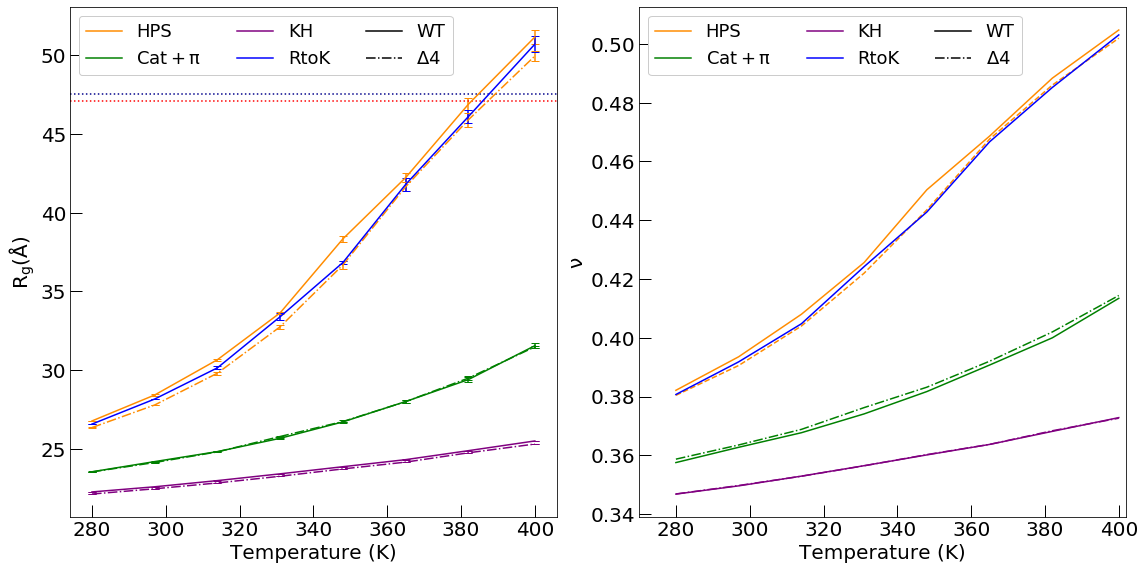

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

colors=['darkorange', 'green', 'purple', 'blue']

l1=axs[0].errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], label='HPS', color=colors[0])
axs[0].errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], ls='dashdot',  color=colors[0])
l2=axs[0].errorbar(wt_pi.temperatures, wt_pi.c_rg[0], yerr=wt_pi.c_rg[1],  color=colors[1], label='$Cat+\pi$')
axs[0].errorbar(d4_pi.temperatures, d4_pi.c_rg[0], yerr=d4_pi.c_rg[1], ls='dashdot', color=colors[1])
l4=axs[0].errorbar(rtok.temperatures, rtok.c_rg[0], yerr=rtok.c_rg[1],  color=colors[3], label='RtoK')
l3=axs[0].errorbar(wt_kh.temperatures, wt_kh.c_rg[0], yerr=wt_kh.c_rg[1],  color=colors[2], label='KH')
axs[0].errorbar(d4_kh.temperatures, d4_kh.c_rg[0], yerr=d4_kh.c_rg[1], ls='dashdot', color=colors[2])
axs[0].set_xlabel("Temperature (K)")
axs[0].set_ylabel("$\mathrm{R_g (\AA)}$")
axs[0].axhline(wt_1.rw_rg(), ls='dotted', color=C_W)
axs[0].axhline(d4_1.rw_rg(), ls='dotted', color=C_4)

lines = [Line2D([0], [0], color=col) for col in colors]

axs[0].legend([*lines,Line2D([0], [0], color='black'), Line2D([0], [0], color='black', ls='dashdot')],
              ['HPS', '$\mathrm{Cat+\pi}$', 'KH','RtoK', 'WT' , '$\Delta$4'],
              loc='upper left', ncol=3)

axs[1].plot(wt_1.temperatures, wt_florys, label='WT', color=colors[0])
axs[1].plot(d4_1.temperatures, d4_florys, label='$\Delta$4', ls='--', color=colors[0])
axs[1].plot(wt_pi.temperatures, wt_pi_florys, color=colors[1])
axs[1].plot(rtok.temperatures, rtok_florys, color=colors[3])
axs[1].plot(d4_pi.temperatures, d4_pi_florys, ls='dashdot', color=colors[1])
axs[1].plot(wt_kh.temperatures, wt_kh_florys, color=colors[2])
axs[1].plot(d4_kh.temperatures, d4_kh_florys, ls='dashdot', color=colors[2])
axs[1].set_xlabel("Temperature (K)")
axs[1].set_ylabel("ν")
axs[1].set_xlim(270,402)
# axs[1].legend([l1,l2,l3,l4,Line2D([0], [0], color='black'), Line2D([0], [0], color='black', ls='dashdot')],
#               ['HPS', '$Cat+\pi$', 'KH','RtoK', 'WT' , '$\Delta$4'],
#               loc='upper left', ncol=3)

lines = [Line2D([0], [0], color=col) for col in colors]
axs[1].legend([*lines,Line2D([0], [0], color='black'), Line2D([0], [0], color='black', ls='dashdot')],
              ['HPS', '$\mathrm{Cat+\pi}$', 'KH','RtoK', 'WT' , '$\Delta$4'],
              loc='upper left', ncol=3)

fig.tight_layout(pad=1.)

[0.01681961 0.02762874 0.1235338  0.25867973 0.23172032 0.48163949
 0.58322368 0.59020189]


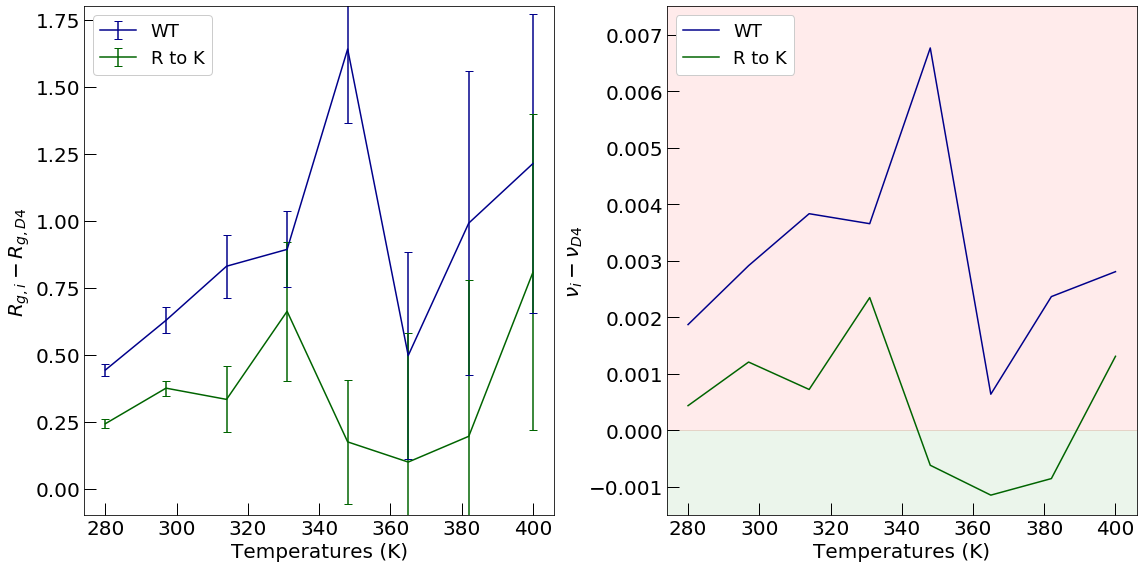

In [76]:
fig, axs = plt.subplots(1,2, figsize=(16,8))
# plt.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], label='$\Delta$4', color=C_4)
err1 = np.sqrt(rtok.c_rg[1]**2+d4_1.c_rg[1]**2)
err2 = np.sqrt(wt_1.c_rg[1]**2+d4_1.c_rg[1]**2)
print(err1)
axs[0].errorbar(wt_1.temperatures, wt_1.c_rg[0]-d4_1.c_rg[0], yerr=err2,label='WT', color=C_W)
axs[0].errorbar(rtok.temperatures, rtok.c_rg[0]-d4_1.c_rg[0], yerr=err1 ,label='R to K', color='darkgreen')
axs[1].errorbar(rtok.temperatures, np.array(wt_florys)-np.array(d4_florys), label='WT', color=C_W)
# axs[1].errorbar(d4_1.temperatures, d4_florys, label='R to K', color='darkgreen')
axs[1].errorbar(wt_1.temperatures, np.array(rtok_florys)-np.array(d4_florys), label='R to K', color='darkgreen')

axs[1].axhspan(0, -0.0015, color="green", alpha=0.08)
axs[1].axhspan(0, 0.0075, color="red", alpha=0.08)

# plt.axhline(wt_1.rw_rg(), color=C_W, ls='dotted')
# plt.axhline(d4_1.rw_rg(), color=C_4, ls='dotted')
axs[0].set_ylim(-0.1,1.8)
axs[1].set_ylim(-0.0015,0.0075)

axs[0].set_xlabel("Temperatures (K)")
axs[1].set_xlabel("Temperatures (K)")
axs[1].set_ylabel("$ν_i-ν_{D4}$")
axs[0].set_ylabel("$R_{g,i}-R_{g,D4}$")

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
fig.tight_layout()

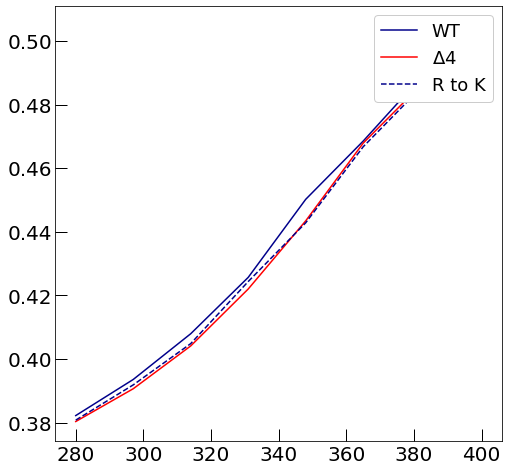

In [11]:
plt.figure(figsize=(8,8))
plt.plot(wt_1.temperatures, wt_florys, label='WT', color=C_W)
plt.plot(d4_1.temperatures, d4_florys, label='$\Delta$4', color=C_4)
plt.plot(rtok.temperatures, rtok_florys, label='R to K', color=C_W, ls='--')
plt.legend()

In [9]:
wt_florys

[0.3822366575487826,
 0.39358550748536303,
 0.4079610058825678,
 0.4256703156218808,
 0.45020527722111126,
 0.4685125987865907,
 0.4884210561387619,
 0.5046241054280912]

#### Cat-$\pi$ and KH

In [85]:
wt_pi = hmd.HMD(md_dir='/home/adria/irb/hoomd/FINAL/CAT-HPS/hps-cat/WT', low_mem=True)
wt_pi_florys = wt_pi.flory_scaling_formula()
d4_pi = hmd.HMD(md_dir='/home/adria/irb/hoomd/FINAL/CAT-HPS/hps-cat/D4', low_mem=True)
d4_pi_florys = d4_pi.flory_scaling_formula()
wt_kh = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/KH/WT')
wt_kh_florys = wt_kh.flory_scaling_formula()
d4_kh = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/KH/D4')
d4_kh_florys = d4_kh.flory_scaling_formula()

> Run Completed at 87.32% for CPEB4_alpha. Ran 873180000 steps for a total of 87319 frames 
> Run Completed at 89.67% for CPEB4_D4. Ran 896670000 steps for a total of 89668 frames 
